- By: Jacques Joubert
- Email: jacques@quantsportal.com
- Reference: Advances in Financial Machine Learning, Marcos Lopez De Prado, pg 40


# Data Analysis

The following data analysis is performed on a series of E-mini S&P 500 futures tick data:

1. Form tick, volume, and dollar bars
2. Count the number of bars produced by tick, volume, and dollar bars on a weekly basis. Plot a time seiries of that bar count. What bar type produces the most stable weekly count? Why?
3. Compute serieal correlation of returns for the three bar types. What bar method has the lowest serial correlation?
4. Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?
5. Standardize & Plot the Distributions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
cd assignment_01_data/

/Users/apple/Documents/WQU/machine_learning_for_finance/assignment_01_data


In [6]:
# import Data & Convert Index to DateTime
path =  '/Users/apple/Documents/WQU/machine_learning_for_finance/assignment_01_data'

time_bars   = pd.read_csv('time_bars.csv', index_col='date')
tick_bars   = pd.read_csv('tick_bars.csv', index_col='date')
volume_bars = pd.read_csv('volume_bars.csv', index_col='date')
dollar_bars = pd.read_csv('dollar_bars.csv', index_col='date')

time_bars.index = pd.to_datetime(time_bars.index)
tick_bars.index = pd.to_datetime(tick_bars.index)
volume_bars.index = pd.to_datetime(volume_bars.index)
dollar_bars.index = pd.to_datetime(dollar_bars.index)

# Show example
dollar_bars.head()

,open,high,low,close,volume,vwap
date,,,,,,
2013-09-01 18:18:58.662,1640.25,1642.00,1639.00,1641.25,21722.0,1640.667273
2013-09-01 21:42:07.388,1641.25,1643.50,1639.75,1640.75,21706.0,1641.830116
2013-09-02 02:05:25.233,1640.75,1644.50,1640.50,1644.50,21652.0,1643.149905
2013-09-02 03:01:56.174,1644.50,1646.00,1642.75,1645.00,21709.0,1644.556854
2013-09-02 04:32:44.340,1645.00,1647.25,1644.25,1645.50,21646.0,1646.012254


## What bar type produces the most stable weekly count? 

In [7]:
time_count = time_bars['close'].resample('W', label='right').count()
tick_count = tick_bars['close'].resample('W', label='right').count()
volume_count = volume_bars['close'].resample('W', label='right').count()
dollar_count = dollar_bars['close'].resample('W', label='right').count()

count_df = pd.concat([time_count, tick_count, volume_count, dollar_count], axis=1)
count_df.columns = ['time', 'tick', 'volume', 'dollar']

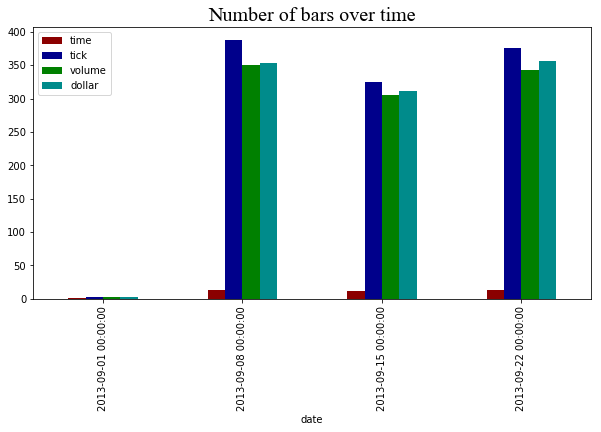

In [8]:
# Plot
count_df.plot(kind='bar', figsize=[10, 5], color=('darkred', 'darkblue', 'green', 'darkcyan'))
plt.title('Number of bars over time', loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.show()

We dont have enough data here to tell which is the most stable bar type. In the paper they use 2 years worth of tick data. We only have 20 days.

## Compute serieal correlation of returns for the three bar types. What bar method has the lowest serial correlation?

In [12]:
time_returns = np.log(time_bars['close']).diff().dropna()
tick_returns = np.log(tick_bars['close']).diff().dropna()
volume_returns = np.log(volume_bars['close']).diff().dropna()
dollar_returns = np.log(dollar_bars['close']).diff().dropna()

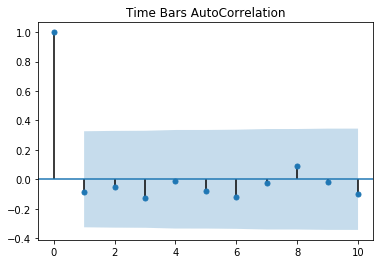

In [13]:
plot_acf(time_returns, lags=10)
plt.title('Time Bars AutoCorrelation')
plt.show()

Note the autocorrelation in the time bars at lag 1.

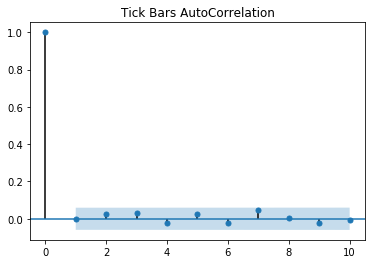

In [14]:
plot_acf(tick_returns, lags=10)
plt.title('Tick Bars AutoCorrelation')
plt.show()

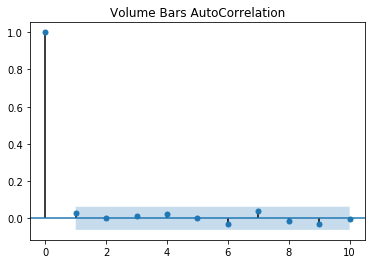

In [15]:
plot_acf(volume_returns, lags=10)
plt.title('Volume Bars AutoCorrelation')
plt.show()

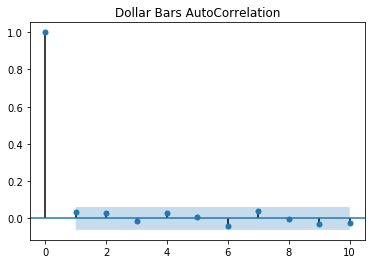

In [16]:
plot_acf(dollar_returns, lags=10)
plt.title('Dollar Bars AutoCorrelation')
plt.show()

## Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?

In [17]:
from scipy import stats

In [19]:
print('Test Statistics:')
print('Time:', '\t', int(stats.jarque_bera(time_returns)[0]))
print('Tick:', '\t', int(stats.jarque_bera(tick_returns)[0]))
print('Volume:', int(stats.jarque_bera(volume_returns)[0]))
print('Dollar:', int(stats.jarque_bera(dollar_returns)[0]))

Test Statistics:
Time: 	 11
Tick: 	 4521
Volume: 4911
Dollar: 11916


## Standardize & Plot the Distributions

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


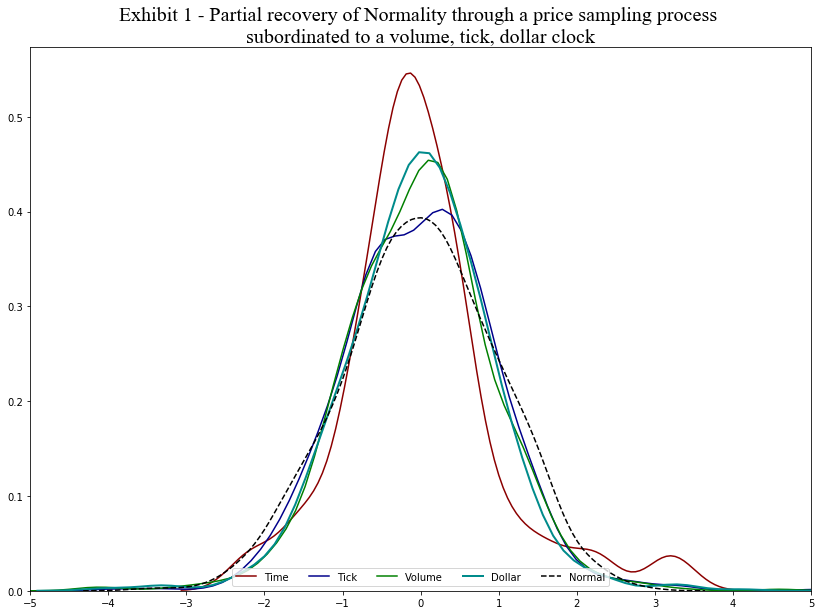

In [20]:
# Calculate the differences
time_diff = time_returns
tick_diff = tick_returns
volume_diff = volume_returns
dollar_diff = dollar_returns

# Standardize the data
time_standard = (time_diff - time_diff.mean()) / time_diff.std()
tick_standard = (tick_diff - tick_diff.mean()) / tick_diff.std()
volume_standard = (volume_diff - volume_diff.mean()) / volume_diff.std()
dollar_standard = (dollar_diff - dollar_diff.mean()) / dollar_diff.std()

# Plot the Distributions
plt.figure(figsize=(14,10))
sns.kdeplot(time_standard, label="Time", bw=0.30, color='darkred')
sns.kdeplot(tick_standard, label="Tick", bw=0.25, color='darkblue')
sns.kdeplot(volume_standard, label="Volume", bw=0.25, color='green')
sns.kdeplot(dollar_standard, label="Dollar", bw=0.25, linewidth=2, color='darkcyan')

sns.kdeplot(np.random.normal(size=len(volume_returns)), label="Normal", color='black', linestyle="--")

plt.xticks(range(-5, 6))
plt.legend(loc=8, ncol=5)
plt.title('Exhibit 1 - Partial recovery of Normality through a price sampling process \nsubordinated to a volume, tick, dollar clock',
          loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.xlim(-5, 5)
plt.show()